In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Image Processing
import cv2

#Machine Learning
from sklearn.svm import SVC
from sklearn import metrics

#System
import os

#pickle untuk menyimpan dan memanggil model
import pickle

#library face_recognition
import face_recognition

In [2]:
nama = ["", "Nabilah", "Melody", "Ayana", "Jeje", "Kinal", "Ve", "Ghaida", "Shanju", "Gaby", "Frieska"]

In [3]:
X_train = []
y_train = []
for i in range(1,11):
    for j in range(1,16):
        path = "./images/JKT48/" + str(i) + "_face/" + str(j) + ".jpg"
        
        #Load Image
        face = face_recognition.load_image_file(path)
        
        #Face Detection
        face_bounding_boxes = face_recognition.face_locations(face)
        
        if len(face_bounding_boxes) == 1:
            
            #feature extraction: cari koordinat 68 titik & simpan dalam bentuk ter-encode
            face_enc = face_recognition.face_encodings(face)[0]
            print ("Membaca gambar nomer " + str(j) + " dari member nomer " + str(i))
            
            #simpan hasil encode dan labelnya
            X_train.append(face_enc)
            y_train.append(i)
        else:
            print("Gambar nomer " + str(j) + " dari member nomer " + str(i) + " tidak dapat dibaca (tidak ditemukan wajah)")
        
        

Membaca gambar nomer 1 dari member nomer 1
Membaca gambar nomer 2 dari member nomer 1
Membaca gambar nomer 3 dari member nomer 1
Membaca gambar nomer 4 dari member nomer 1
Membaca gambar nomer 5 dari member nomer 1
Membaca gambar nomer 6 dari member nomer 1
Membaca gambar nomer 7 dari member nomer 1
Membaca gambar nomer 8 dari member nomer 1
Membaca gambar nomer 9 dari member nomer 1
Membaca gambar nomer 10 dari member nomer 1
Membaca gambar nomer 11 dari member nomer 1
Membaca gambar nomer 12 dari member nomer 1
Membaca gambar nomer 13 dari member nomer 1
Membaca gambar nomer 14 dari member nomer 1
Membaca gambar nomer 15 dari member nomer 1
Membaca gambar nomer 1 dari member nomer 2
Membaca gambar nomer 2 dari member nomer 2
Membaca gambar nomer 3 dari member nomer 2
Membaca gambar nomer 4 dari member nomer 2
Membaca gambar nomer 5 dari member nomer 2
Membaca gambar nomer 6 dari member nomer 2
Membaca gambar nomer 7 dari member nomer 2
Membaca gambar nomer 8 dari member nomer 2
Memba

In [4]:
model_baru = SVC()
model_baru.fit(X_train, y_train)

SVC()

In [5]:
def kenali(imagepath, model):
    import time
    
    detected_face = []
    bounding_box = []
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #pencatatan waktu
    time_start = time.time()
    
    face = face_recognition.load_image_file(imagepath)
    face_bounding_boxes = face_recognition.face_locations(face)
    number_of_face = len(face_bounding_boxes)
    
    if number_of_face != 0:
        for i in range(number_of_face):
            test_image_enc = face_recognition.face_encodings(face)[i]
            id_prediction = model.predict([test_image_enc])
            detected_face.append(id_prediction[0])
            bounding_box.append(face_bounding_boxes[i])
            
    else:
        print("Tidak ada wajah yang terdeteksi")
    
    time_end = time.time()
              
    #untuk preview
    img=cv2.imread(imagepath)
    index = 0
    for (y1,x2,y2,x1) in bounding_box:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0, 204, 255),2)
        cv2.putText(img,nama[detected_face[index]],(x1,y1-10), font, 1, (0, 204, 255), 2, cv2.LINE_AA)
        index = index+1
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img_rgb)
    plt.show()  
    
    print(f"waktu yang diperlukan: {time_end - time_start} detik")

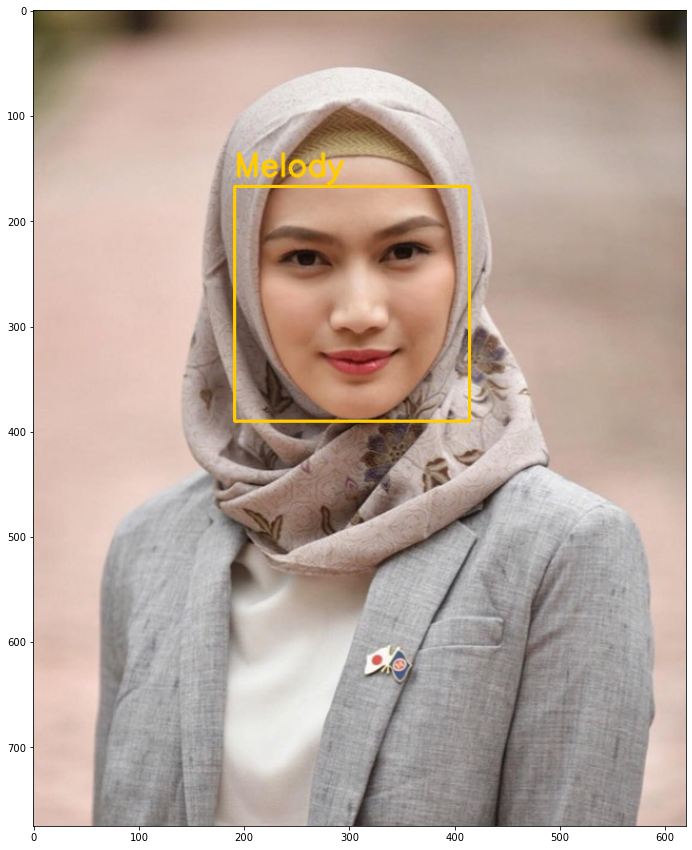

waktu yang diperlukan: 1.1983332633972168 detik


In [6]:
image_path = './images/JKT48/facetest/test_1.jpg'
kenali(image_path, model_baru)

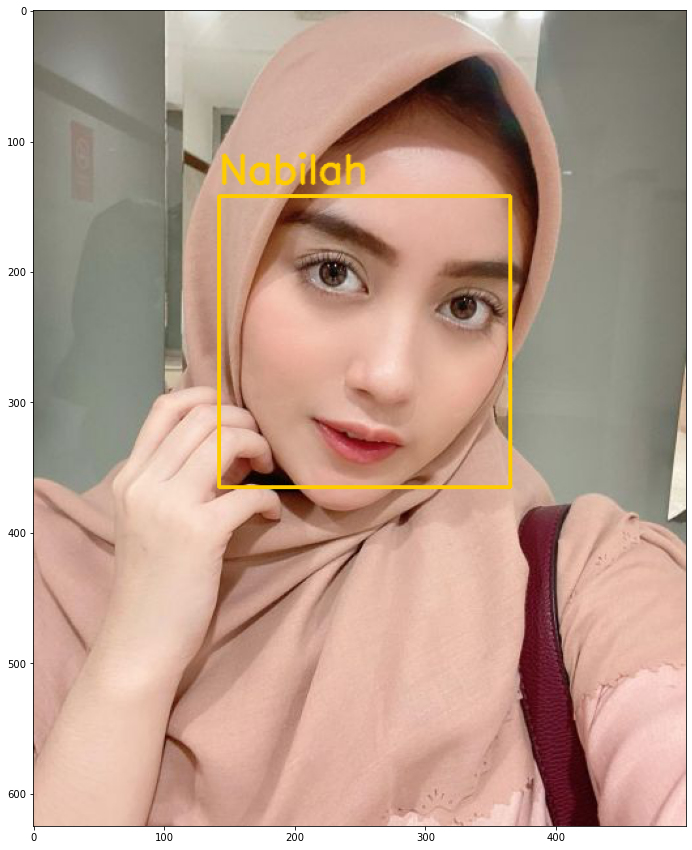

waktu yang diperlukan: 0.9335064888000488 detik


In [7]:
image_path = './images/JKT48/facetest/test_10.jpg'
kenali(image_path, model_baru)

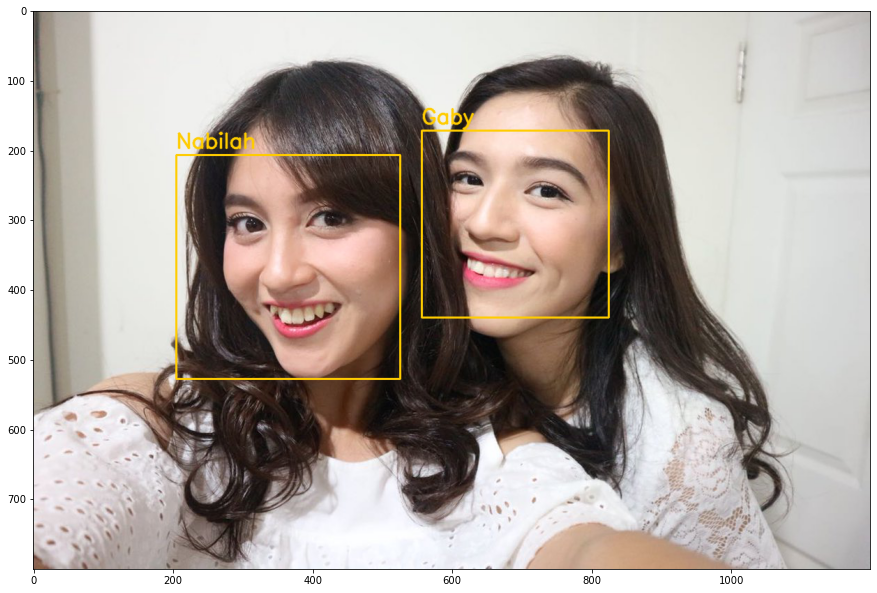

waktu yang diperlukan: 4.927410125732422 detik


In [8]:
image_path = './images/JKT48/facetest/test_17.jpg'
kenali(image_path, model_baru)

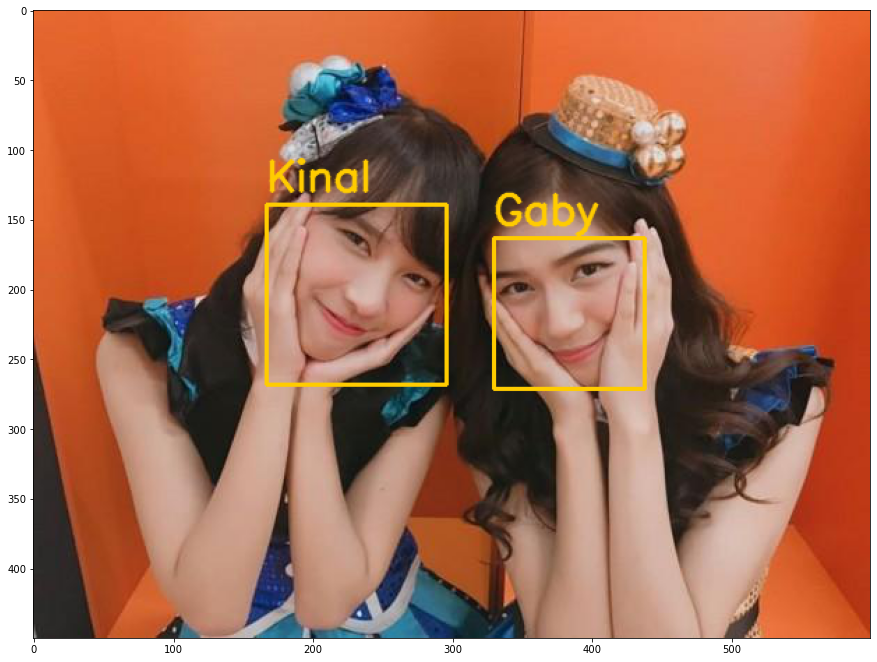

waktu yang diperlukan: 2.691427230834961 detik


In [9]:
image_path = './images/JKT48/facetest/test_19.jpg'
kenali(image_path, model_baru)

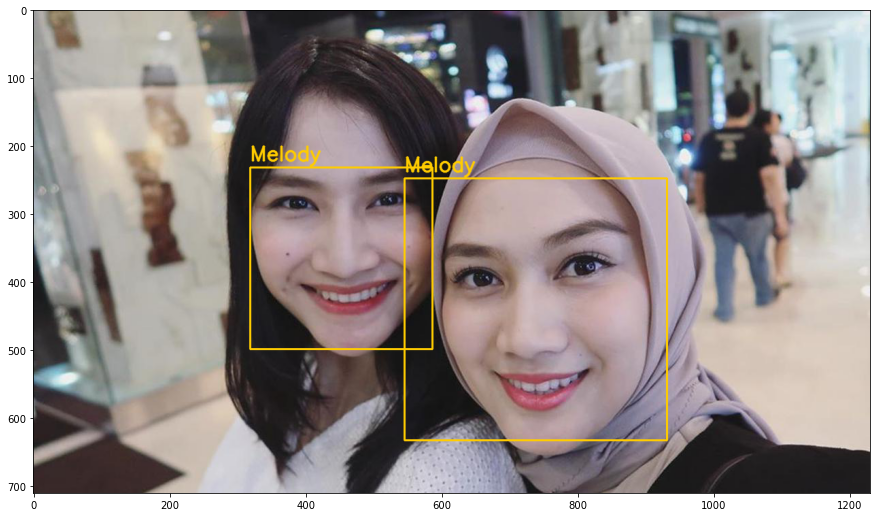

waktu yang diperlukan: 4.363793611526489 detik


In [10]:
image_path = './images/JKT48/facetest/test_20.jpg'
kenali(image_path, model_baru)

In [11]:
import pickle
filename = './model/model_JKT48.sav'
pickle.dump(model_baru, open(filename, 'wb'))